# Linear Regression

## Imports

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [40]:
tf.random.set_seed(10)

In [9]:
assert len(tf.config.list_physical_devices('GPU')) == 1

## Synthetic Data Creation

In [43]:
def generate_data(no_of_features, no_of_example):
    X = tf.zeros((no_of_example, no_of_features))
    """Adding noise"""
    X += tf.random.normal(shape=X.shape)
    tf.random.shuffle(X)
    w = tf.random.normal(shape=(no_of_features, 1), mean=5, stddev=1)
    b = tf.random.normal(shape=(1, 1), mean=3, stddev=2)
    y = tf.matmul(X, w) + b
    """Adding small noise to output"""
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    return X, y

In [44]:
def test_generate_data():
    no_of_feat = 2
    no_of_ex = 1000
    x, y = generate_data(no_of_feat, no_of_ex)
    assert x.shape == (no_of_ex, no_of_feat)
    assert y.shape == (no_of_ex, 1)
    
test_generate_data()

In [45]:
no_of_features = 2
no_of_examples = 1000

In [46]:
data, label = generate_data(no_of_features, no_of_examples)

## Visualize Data

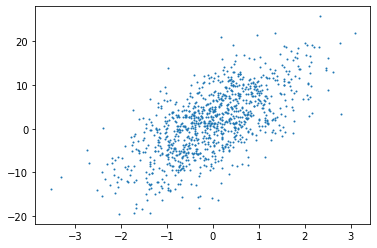

In [47]:
plt.scatter(data[:, 0], label, 1)
plt.show()

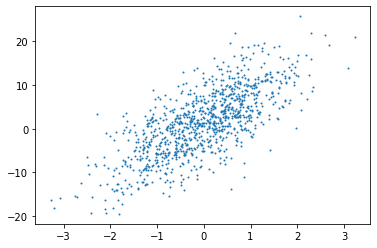

In [48]:
plt.scatter(data[:, 1], label, 1)
plt.show()

## Helper Functions

### Data Itterator

In [13]:
def data_itterator(x, y, batch_size):
    m = x.shape[0]
    no_of_batch = int(np.ceil(m/batch_size))
    for i in range(no_of_batch):
        batch_start = i * batch_size
        batch_end = min((i + 1) * batch_size, m)
        yield x[batch_start: batch_end], y[batch_start: batch_end]

In [19]:
def test_data_itterator():
    batch_size = 32
    no_of_batch = np.floor(no_of_examples/batch_size)
    remainder = no_of_examples % batch_size
    i = 0
    for x, y in data_itterator(data, label, batch_size):
        if i < no_of_batch:
            assert x.shape == (batch_size, no_of_features)
            assert y.shape == (batch_size, 1)
        else:
            assert x.shape == (remainder, no_of_features)
            assert y.shape == (remainder, 1)
        i += 1


test_data_itterator()

### Model Paramerters

In [14]:
def init_model_parameters(no_of_feat):
    w = tf.Variable(tf.random.normal(shape=(no_of_feat, 1), mean=0, stddev=1), trainable=True)
    b = tf.Variable(tf.random.normal(shape=(1, 1), mean=0, stddev=1), trainable=True)
    return w, b

In [23]:
def test_init_model_parameters():
    w, b = init_model_parameters(no_of_features)
    assert w.shape == (no_of_features, 1)
    assert b.shape == (1, 1)


test_init_model_parameters()

### Model Definition

In [15]:
def model_linear_regression(x, w, b):
    assert x.shape[1] == w.shape[0]
    return tf.matmul(x, w) + b

### L2 Loss

In [16]:
def l2_loss(y_pred, y_actual):
    return (y_pred - y_actual)**2 / 2

### Mini Batch Stochastic Gradient Descent

In [17]:
def sgd_optimizer(params, gradients, learning_rate, batch_size):
    for param, grad in zip(params, gradients):
        param.assign(param - learning_rate * grad)

### Train Test Validation Split

In [49]:
def train_test_validation_split(x, y, train_ratio, validation_ratio):
    assert train_ratio < 1
    assert validation_ratio < 1
    assert train_ratio + validation_ratio < 1
    assert x.shape[0] == y.shape[0]
    m = len(y)
    train_size = int(m * train_ratio)
    validation_size = int(m * validation_ratio)
    x_train = x[0:train_size]
    y_train = y[0:train_size]
    x_validation = x[train_size:(train_size+validation_size)]
    y_validation = y[train_size:(train_size+validation_size)]
    x_test = x[(train_size+validation_size):]
    y_test = y[(train_size+validation_size):]
    return x_train, y_train, x_validation, y_validation, x_test, y_test

## Training

In [37]:
learning_rate = 0.01
batch_size = 32
num_epochs = 1000
train_ratio = 0.6
validation_ratio = 0.2
shuffle = True

In [54]:
w, b = init_model_parameters(no_of_features)

In [50]:
x_train, y_train, x_validation, y_validation, x_test, y_test = train_test_validation_split(data, label, train_ratio, validation_ratio)

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

(600, 2)
(600, 1)
(200, 2)
(200, 1)
(200, 2)
(200, 1)


In [59]:
for epoch in range(num_epochs):
    for x, y in data_itterator(x_train, y_train, batch_size):
        with tf.GradientTape() as g:
            y_pred = model_linear_regression(x, w, b)
            loss = l2_loss(y_pred, y)
        dw, db = g.gradient(loss, [w, b])
        sgd_optimizer([w, b], [dw, db], learning_rate, batch_size)
    train_loss = l2_loss(model_linear_regression(x_validation, w, b), y_validation)
    validation_loss = tf.reduce_mean(train_loss)
    print('Validation loss after ' + str(epoch) + '----->' + str(validation_loss))

Validation loss after 0----->tf.Tensor(5.1380586e-05, shape=(), dtype=float32)
Validation loss after 1----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 2----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 3----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 4----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 5----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 6----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 7----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 8----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 9----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 10----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 11----->tf.Tensor(5.138401e-05, shape=(), dtype=float32)
Validation loss after 12----->tf.Tensor(5.138401e-05, shape=(

In [61]:
tf.reduce_mean(l2_loss(model_linear_regression(x_test, w, b), y_test))

<tf.Tensor: shape=(), dtype=float32, numpy=4.943266e-05>